In [1]:
# モジュールのインポート
import numpy as np
import pandas as pd
import sklearn as sk

scikit-learnのデータセット"Iris"から、アヤメの分類をする。
使用するアルゴリズムは以下の通り

1. ロジスティック回帰
1. サポートベクターマシン（SVM）
1. カーネルSVM

In [2]:
# 推定結果のスコア表示
def print_score(model, x_test, y_test):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"accuracy:{acc}")
    
    pre = precision_score(y_test, y_pred, average='micro')
    print(f"precision:{pre}")
    
    rec = recall_score(y_test, y_pred, average='micro')
    print(f"recall:{rec}")
    
    f1 = f1_score(y_test, y_pred, average='micro')
    print(f"f1score:{f1}")

In [3]:
%matplotlib notebook

# 正解と推定結果のグラフ表示
def show_predict(model, x_test, y_test, figname='feature-predict map', mask=None):
    import matplotlib.pyplot as plt

    y_pred = model.predict(x_test)
    
    h = .02
    x_min = x_test[:, 0].min() - 1
    x_max = x_test[:, 0].max() + 1
    y_min = x_test[:, 1].min() - 1
    y_max = x_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    z = z.reshape(xx.shape)
    fig = plt.figure(figsize=(5,5))
    plt.pcolormesh(xx, yy, z, cmap=plt.cm.Paired)
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k')
    plt.title(figname)
    plt.axis('tight')
    plt.show()

In [4]:
# データセットの表示
import sklearn.datasets
iris_set = sklearn.datasets.load_iris()

print("class:{}".format(np.unique(iris_set.target)) )
pd.DataFrame(np.column_stack((iris_set.data[:,:2], iris_set.target.reshape(-1,1))), columns=np.append(iris_set.feature_names[:2],'class') )

class:[0 1 2]


,sepal length (cm),sepal width (cm),class
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0
3,4.6,3.1,0.0
4,5.0,3.6,0.0
5,5.4,3.9,0.0
6,4.6,3.4,0.0
7,5.0,3.4,0.0
8,4.4,2.9,0.0
9,4.9,3.1,0.0


In [5]:
# 学習とテストデータの分離
from sklearn.model_selection import train_test_split

iris_x_train, iris_x_test, iris_y_train, iris_y_test = \
    train_test_split(iris_set.data[:,:2], iris_set.target, test_size=0.2, random_state=None)

##### ロジスティック回帰

In [6]:
# 学習、テストデータの正規化
from sklearn.preprocessing import StandardScaler

iris_scaler = StandardScaler()
iris_scaler.fit(iris_x_train)

iris_x_train_std = iris_scaler.transform(iris_x_train)
iris_x_test_std = iris_scaler.transform(iris_x_test)

accuracy:0.8
precision:0.8
recall:0.8
f1score:0.8000000000000002


<IPython.core.display.Javascript object>


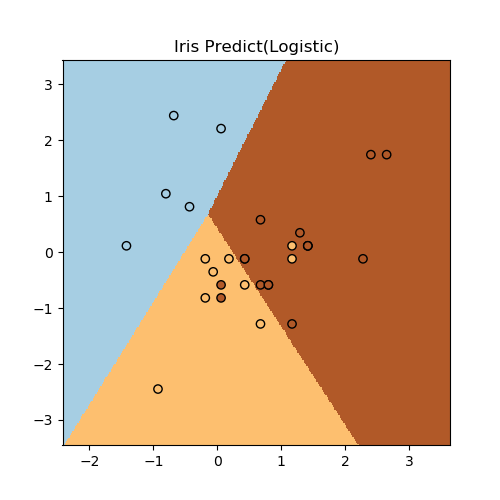

In [7]:
# 学習と推定
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=1000.0, random_state=0)
log_reg.fit(iris_x_train_std, iris_y_train)

print_score(log_reg, iris_x_test_std, iris_y_test)
show_predict(log_reg, iris_x_test_std, iris_y_test, figname='Iris Predict(Logistic)')

##### サポートベクターマシン（SVM）

accuracy:0.7666666666666667
precision:0.7666666666666667
recall:0.7666666666666667
f1score:0.7666666666666667


<IPython.core.display.Javascript object>


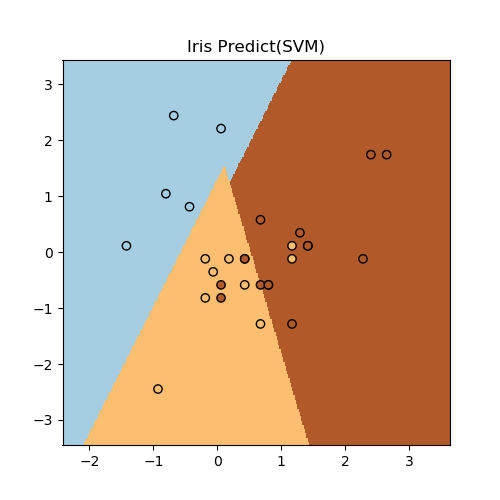

In [8]:
from sklearn.svm import SVC

svm_reg = SVC(kernel='linear', C=10.0, random_state=0)
svm_reg.fit(iris_x_train_std, iris_y_train)

print_score(svm_reg, iris_x_test_std, iris_y_test)
show_predict(svm_reg, iris_x_test_std, iris_y_test, figname='Iris Predict(SVM)')

##### カーネルSVM

accuracy:0.7666666666666667
precision:0.7666666666666667
recall:0.7666666666666667
f1score:0.7666666666666667


<IPython.core.display.Javascript object>


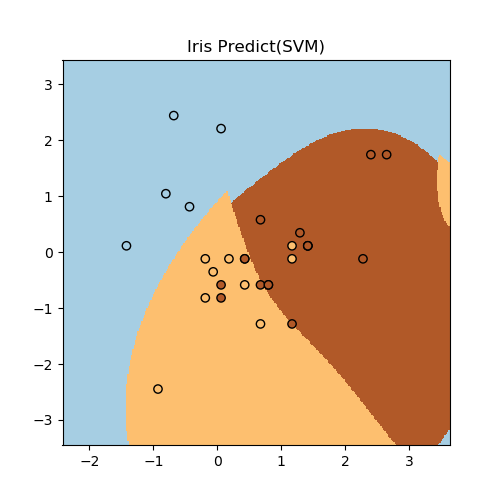

In [9]:
from sklearn.svm import SVC

ksvm_reg = SVC(kernel='rbf', gamma=0.1, C=100.0, random_state=0)
ksvm_reg.fit(iris_x_train_std, iris_y_train)

print_score(ksvm_reg, iris_x_test_std, iris_y_test)
show_predict(ksvm_reg, iris_x_test_std, iris_y_test, figname='Iris Predict(SVM)')

In [10]:
# パラメータ調整
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

log_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
log_grid = [{'gamma': log_range, 'C': log_range}]
iris_gs = GridSearchCV(estimator = SVC(kernel='rbf', random_state=0),
                  param_grid = log_grid, cv=10, n_jobs=-1)
iris_gs.fit(iris_x_train_std, iris_y_train)

print("cross validation accuracy:{}".format(iris_gs.best_score_) )
print("best gamma:{}".format(iris_gs.best_params_['gamma']) )
print("best C:{}".format(iris_gs.best_params_['C']) )

cross validation accuracy:0.8083333333333333
best gamma:0.001
best C:1000.0
